In [1]:
import numpy as np
import pandas as pd
import re
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [33]:
# Loading data into a DataFrame
df = pd.read_csv('Customer_Reviews1.csv')  

In [3]:
df.head()

,UID,group_description,category_description,product_description,city,Feedback
0,1,Large Appliances,Washing Machines,LG W/M FL 6KG FHT1006ZNW WHT 5S,Faridabad,NaN
1,2,Entertainment,TV LCD,Croma Led HDR FireTv 32in EL7364 3Yr Wty,Surat,NaN
2,3,Large Appliances,Air Conditioners,LG INV/AC 1.5T MSQ18SWZD WF 5S,Ahmedabad,Very good service
3,4,Large Appliances,Air Conditioners,LG INV/AC 1.5T MSQ18ANZA 5S,Ahmedabad,NaN
4,5,Large Appliances,Air Conditioners,LG W/AC INV 1T JW-Q12WUZA 5S,Chennai,Quick and to the point service


In [34]:
df['Feedback']

0                                                       NaN
1                                                       NaN
2                                         very good service
3                                                       NaN
4                            quick and to the point service
                                ...                        
849960    the salesman mr. vivek looking after computers...
849961            staffs behaviour and support is very good
849962                                         nice service
849963                                                  NaN
849964                                                   Na
Name: Feedback, Length: 849965, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849965 entries, 0 to 849964
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   UID                   849965 non-null  int64 
 1   group_description     849965 non-null  object
 2   category_description  849965 non-null  object
 3   product_description   849963 non-null  object
 4   city                  849965 non-null  object
 5   Feedback              715351 non-null  object
dtypes: int64(1), object(5)
memory usage: 38.9+ MB


In [6]:
df['Feedback'].value_counts()

Feedback
Good service                                                                                                                                                                              22637
Very good                                                                                                                                                                                 12692
Good service                                                                                                                                                                              10608
Good experience                                                                                                                                                                            9676
Excellent                                                                                                                                                                                  9205
                               

In [7]:
# Removed unwanted columns
df.drop(["UID","product_description"],axis=1,inplace=True)

In [8]:
df['Feedback'].isnull().sum()

134614

# Data Cleaning using Regex

In [35]:
def clean_text(text):
    # Remove special characters
    new_text = str(text)
    new_text = re.sub(r'[^a-zA-Z0-9. ]', '', new_text)
    # Remove extra spaces
    new_text = re.sub(r'\.+', '.', new_text)
    new_text = re.sub(r'\s+', ' ', new_text).strip()
    return new_text

In [36]:
df['Feedback'] = df["Feedback"].replace(".","NA")

In [37]:
df['Feedback'] = df['Feedback'].fillna('NA')

In [38]:
df["Feedback"].apply(clean_text)

0                                                        NA
1                                                        NA
2                                         very good service
3                                                        NA
4                            quick and to the point service
                                ...                        
849960    the salesman mr. vivek looking after computers...
849961            staffs behaviour and support is very good
849962                                         nice service
849963                                                   NA
849964                                                   Na
Name: Feedback, Length: 849965, dtype: object

In [39]:
df["Feedback"] = df["Feedback"].str.lower()

In [40]:
df

,Unnamed: 0,group_description,category_description,city,Feedback
0,0,Large Appliances,Washing Machines,Faridabad,na
1,1,Entertainment,TV LCD,Surat,na
2,2,Large Appliances,Air Conditioners,Ahmedabad,very good service
3,3,Large Appliances,Air Conditioners,Ahmedabad,na
4,4,Large Appliances,Air Conditioners,Chennai,quick and to the point service
...,...,...,...,...,...
849960,849960,Communication,Phones Mobile Accessories,Baroda,the salesman mr. vivek looking after computers...
849961,849961,Entertainment,Earphones/Headphones,Pune,staffs behaviour and support is very good
849962,849962,Computers Peripherals,Mobile Computing,Ahmedabad,nice service
849963,849963,Communication,Smart Phones (OS Based),Bangalore,na


In [41]:
df.to_csv("data1.csv")

In [42]:
df = pd.read_csv('data1.csv')

# Tokenization of data using spacy library

In [18]:
# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

In [43]:
# Function to tokenized data
def tokenized_feedback (text):
    doc = nlp(text)
    return [token.text for token in doc]    

# Slicing data to apply tokenized Function

In [44]:
df1 = df.iloc[:100000]

In [45]:
df2 = df.iloc[100000:200000]

In [46]:
df3 = df.iloc[200000:300000]

In [47]:
df4 = df.iloc[300000:400000]

In [48]:
df5 = df.iloc[400000:500000]

In [49]:
df6 = df.iloc[500000:600000]

In [50]:
df7 = df.iloc[600000:700000]

In [51]:
df8 = df.iloc[700000:800000]

In [52]:
df9 = df.iloc[800000:]

In [53]:
df1

,Unnamed: 0.1,Unnamed: 0,group_description,category_description,city,Feedback
0,0,0,Large Appliances,Washing Machines,Faridabad,na
1,1,1,Entertainment,TV LCD,Surat,na
2,2,2,Large Appliances,Air Conditioners,Ahmedabad,very good service
3,3,3,Large Appliances,Air Conditioners,Ahmedabad,na
4,4,4,Large Appliances,Air Conditioners,Chennai,quick and to the point service
...,...,...,...,...,...,...
99995,99995,99995,Large Appliances,Washing Machines,Gwalior,good service
99996,99996,99996,Large Appliances,Washing Machines,Bangalore,na
99997,99997,99997,Entertainment,TV LCD,Ghaziabad,bill elll
99998,99998,99998,Large Appliances,Washing Machines,Hyderabad,ok it was good


# Applying functiton to sliced dataframes 

In [16]:
df1['Tokenized_Feedback'] = df1['Feedback'].apply(tokenized_feedback)

C:\Users\DELLL\AppData\Local\Temp\ipykernel_9688\3737918210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Tokenized_Feedback'] = df1['Feedback'].apply(tokenized_feedback)


In [17]:
df2['Tokenized_Feedback'] = df2['Feedback'].apply(tokenized_feedback)

C:\Users\DELLL\AppData\Local\Temp\ipykernel_9688\1349600821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Tokenized_Feedback'] = df2['Feedback'].apply(tokenized_feedback)


In [18]:
df3['Tokenized_Feedback'] = df3['Feedback'].apply(tokenized_feedback)

C:\Users\DELLL\AppData\Local\Temp\ipykernel_9688\348583327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Tokenized_Feedback'] = df3['Feedback'].apply(tokenized_feedback)


In [19]:
df4['Tokenized_Feedback'] = df4['Feedback'].apply(tokenized_feedback)

C:\Users\DELLL\AppData\Local\Temp\ipykernel_9688\2946896691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Tokenized_Feedback'] = df4['Feedback'].apply(tokenized_feedback)


In [20]:
df5['Tokenized_Feedback'] = df5['Feedback'].apply(tokenized_feedback)

C:\Users\DELLL\AppData\Local\Temp\ipykernel_9688\1450797273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Tokenized_Feedback'] = df5['Feedback'].apply(tokenized_feedback)


In [21]:
df6['Tokenized_Feedback'] = df6['Feedback'].apply(tokenized_feedback)

C:\Users\DELLL\AppData\Local\Temp\ipykernel_9688\3696455032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Tokenized_Feedback'] = df6['Feedback'].apply(tokenized_feedback)


In [22]:
df7['Tokenized_Feedback'] = df7['Feedback'].apply(tokenized_feedback)

C:\Users\DELLL\AppData\Local\Temp\ipykernel_9688\2732868087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['Tokenized_Feedback'] = df7['Feedback'].apply(tokenized_feedback)


In [23]:
df8['Tokenized_Feedback'] = df8['Feedback'].apply(tokenized_feedback)

C:\Users\DELLL\AppData\Local\Temp\ipykernel_9688\62729737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['Tokenized_Feedback'] = df8['Feedback'].apply(tokenized_feedback)


In [24]:
df9['Tokenized_Feedback'] = df9['Feedback'].apply(tokenized_feedback)

C:\Users\DELLL\AppData\Local\Temp\ipykernel_9688\3049766915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['Tokenized_Feedback'] = df9['Feedback'].apply(tokenized_feedback)


In [31]:
df_Tokens = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9], ignore_index=True)

In [32]:
df_Tokens

,Unnamed: 0,group_description,category_description,city,Feedback
0,0,Large Appliances,Washing Machines,Faridabad,na
1,1,Entertainment,TV LCD,Surat,na
2,2,Large Appliances,Air Conditioners,Ahmedabad,very good service
3,3,Large Appliances,Air Conditioners,Ahmedabad,na
4,4,Large Appliances,Air Conditioners,Chennai,quick and to the point service
...,...,...,...,...,...
849960,849960,Communication,Phones Mobile Accessories,Baroda,the salesman mr. vivek (looking after computer...
849961,849961,Entertainment,Earphones/Headphones,Pune,staffs behaviour and support is very good
849962,849962,Computers Peripherals,Mobile Computing,Ahmedabad,nice service
849963,849963,Communication,Smart Phones (OS Based),Bangalore,na


In [29]:
df_Tokens.to_csv("data2.csv")

In [80]:
df_new = pd.read_csv('data2.csv')

In [58]:
df_new

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,group_description,category_description,city,Feedback,Tokenized_Feedback
0,0,0,0,Large Appliances,Washing Machines,Faridabad,na,['na']
1,1,1,1,Entertainment,TV LCD,Surat,na,['na']
2,2,2,2,Large Appliances,Air Conditioners,Ahmedabad,very good service,"['very', 'good', 'service']"
3,3,3,3,Large Appliances,Air Conditioners,Ahmedabad,na,['na']
4,4,4,4,Large Appliances,Air Conditioners,Chennai,quick and to the point service,"['quick', 'and', 'to', 'the', 'point', 'service']"
...,...,...,...,...,...,...,...,...
849960,849960,849960,849960,Communication,Phones Mobile Accessories,Baroda,the salesman mr. vivek looking after computers...,"['the', 'salesman', 'mr', '.', 'vivek', 'looki..."
849961,849961,849961,849961,Entertainment,Earphones/Headphones,Pune,staffs behaviour and support is very good,"['staffs', 'behaviour', 'and', 'support', 'is'..."
849962,849962,849962,849962,Computers Peripherals,Mobile Computing,Ahmedabad,nice service,"['nice', 'service']"
849963,849963,849963,849963,Communication,Smart Phones (OS Based),Bangalore,na,['na']


# Part-of-Speech (Grammatical role for each tokens on feedback column)

In [77]:
# Function to create part-of-speech of feedback column
def get_pos_tags(feedbacks):
    docs = nlp.pipe(feedbacks)  # Process feedbacks in batch
    results = []
    for doc in docs:
        pos_tags = []
        for token in doc:
            if not token.is_punct:  # Ignore punctuation
                pos_tags.append((token.text, token.pos_))
        results.append(pos_tags)
    return results 

In [81]:
df_new1 = df_new.iloc[:849964]  # Ensuring we have exactly 849,964 rows

In [82]:
df_new1.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1,inplace=True)

C:\Users\DELLL\AppData\Local\Temp\ipykernel_1700\1249125858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1,inplace=True)


# Applying the function to the feedback column in chunks

In [83]:
chunk_size = 50000  # Defining the size of each chunk
pos_tags_list = []

for start in range(0, len(df_new1), chunk_size):
    end = min(start + chunk_size, len(df_new1))
    feedback_chunk = df_new1['Tokenized_Feedback'][start:end].tolist()
    pos_tags_chunk = get_pos_tags(feedback_chunk)  # Apply function
    pos_tags_list.extend(pos_tags_chunk)

In [90]:
# To store the results in a new column
df_new1['POS_Feedback'] = pos_tags_list

C:\Users\DELLL\AppData\Local\Temp\ipykernel_1700\91674119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1['POS_Feedback'] = pos_tags_list


In [91]:
df_new1['POS_Feedback']

0                                                 [(na, X)]
1                                                 [(na, X)]
2               [(very, ADV), (good, ADJ), (service, NOUN)]
3                                                 [(na, X)]
4         [(quick, ADJ), (and, CCONJ), (to, PART), (the,...
                                ...                        
849959    [(good, ADJ), (and, CCONJ), (efficient, ADJ), ...
849960    [(the, DET), (salesman, NOUN), (mr, PROPN), (v...
849961    [(staffs, NOUN), (behaviour, NOUN), (and, CCON...
849962                       [(nice, ADJ), (service, NOUN)]
849963                                            [(na, X)]
Name: POS_Feedback, Length: 849964, dtype: object

In [92]:
df_new1.to_csv("data3.csv") # saving data in new csv file

In [85]:
df_new2 = pd.read_csv('data3.csv')

# Vader Sentiment analyser to get sentiments from small text in feedback column

In [5]:
# Initialize the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [128]:
# Function for analysing the sentiments 
def get_sentiment(feedback):
    score = analyzer.polarity_scores(feedback)
    compound_score = score['compound']
    
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [132]:
df_new2['Sentiment_Score'] = df_new2['Feedback'].apply(get_sentiment)

In [133]:
df_new2['Sentiment_Score']

0          neutral
1          neutral
2         positive
3          neutral
4          neutral
            ...   
849959    positive
849960    positive
849961    positive
849962    positive
849963     neutral
Name: Sentiment_Score, Length: 849964, dtype: object

In [134]:
df_new2.to_csv("data4.csv") # saving data in new csv file

In [62]:
df_new3 = pd.read_csv('data4.csv')  

In [64]:
df_new3

,group_description,category_description,city,Feedback,Tokenized_Feedback,POS_Feedback,Sentiment_Score
0,Large Appliances,Washing Machines,Faridabad,na,['na'],"[('na', 'X')]",neutral
1,Entertainment,TV LCD,Surat,na,['na'],"[('na', 'X')]",neutral
2,Large Appliances,Air Conditioners,Ahmedabad,very good service,"['very', 'good', 'service']","[('very', 'ADV'), ('good', 'ADJ'), ('service',...",positive
3,Large Appliances,Air Conditioners,Ahmedabad,na,['na'],"[('na', 'X')]",neutral
4,Large Appliances,Air Conditioners,Chennai,quick and to the point service,"['quick', 'and', 'to', 'the', 'point', 'service']","[('quick', 'ADJ'), ('and', 'CCONJ'), ('to', 'P...",neutral
...,...,...,...,...,...,...,...
849959,Communication,Smart Phones (OS Based),Mumbai,good and efficient staff,"['good', 'and', 'efficient', 'staff']","[('good', 'ADJ'), ('and', 'CCONJ'), ('efficien...",positive
849960,Communication,Phones Mobile Accessories,Baroda,the salesman mr. vivek looking after computers...,"['the', 'salesman', 'mr', '.', 'vivek', 'looki...","[('the', 'DET'), ('salesman', 'NOUN'), ('mr', ...",positive
849961,Entertainment,Earphones/Headphones,Pune,staffs behaviour and support is very good,"['staffs', 'behaviour', 'and', 'support', 'is'...","[('staffs', 'NOUN'), ('behaviour', 'NOUN'), ('...",positive
849962,Computers Peripherals,Mobile Computing,Ahmedabad,nice service,"['nice', 'service']","[('nice', 'ADJ'), ('service', 'NOUN')]",positive


In [63]:
df_new3.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1,inplace=True)

In [140]:
# Functioin to extract summary phrases
def extract_summary_phrases(feedback):
    doc = nlp(feedback)
    summary_phrases = []

    for token in doc:
        # Checking for adjectives or verbs
        if token.pos_ in {'ADJ', 'VERB'}:
            phrase = [token.text]
            # Looking for following nouns (and articles/prepositions)
            for child in token.children:
                if child.dep_ in {'det', 'prep', 'pobj'} or child.pos_ in {'NOUN', 'PROPN'}:
                    phrase.append(child.text)

            # Building the phrase
            phrase_str = ' '.join(phrase)
            if phrase_str not in summary_phrases:  # Avoid duplicates
                summary_phrases.append(phrase_str)

    return summary_phrases

In [150]:
df_new3['Summary_phrases'] = df_new3['Feedback'].apply(extract_summary_phrases)

In [152]:
df_new3

,group_description,category_description,city,Feedback,Tokenized_Feedback,POS_Feedback,Sentiment_Score,Summary_phrases
0,Large Appliances,Washing Machines,Faridabad,na,['na'],"[('na', 'X')]",neutral,[]
1,Entertainment,TV LCD,Surat,na,['na'],"[('na', 'X')]",neutral,[]
2,Large Appliances,Air Conditioners,Ahmedabad,very good service,"['very', 'good', 'service']","[('very', 'ADV'), ('good', 'ADJ'), ('service',...",positive,[good]
3,Large Appliances,Air Conditioners,Ahmedabad,na,['na'],"[('na', 'X')]",neutral,[]
4,Large Appliances,Air Conditioners,Chennai,quick and to the point service,"['quick', 'and', 'to', 'the', 'point', 'service']","[('quick', 'ADJ'), ('and', 'CCONJ'), ('to', 'P...",neutral,[quick]
...,...,...,...,...,...,...,...,...
849959,Communication,Smart Phones (OS Based),Mumbai,good and efficient staff,"['good', 'and', 'efficient', 'staff']","[('good', 'ADJ'), ('and', 'CCONJ'), ('efficien...",positive,"[good, efficient]"
849960,Communication,Phones Mobile Accessories,Baroda,the salesman mr. vivek looking after computers...,"['the', 'salesman', 'mr', '.', 'vivek', 'looki...","[('the', 'DET'), ('salesman', 'NOUN'), ('mr', ...",positive,"[looking vivek after, cooperative, mannered, f..."
849961,Entertainment,Earphones/Headphones,Pune,staffs behaviour and support is very good,"['staffs', 'behaviour', 'and', 'support', 'is'...","[('staffs', 'NOUN'), ('behaviour', 'NOUN'), ('...",positive,[good]
849962,Computers Peripherals,Mobile Computing,Ahmedabad,nice service,"['nice', 'service']","[('nice', 'ADJ'), ('service', 'NOUN')]",positive,[nice]


In [153]:
df_new3.to_csv("data5.csv") # saving data in new csv file

In [65]:
df_new4 = pd.read_csv('data5.csv')

In [66]:
df_new4

,Unnamed: 0,group_description,category_description,city,Feedback,Tokenized_Feedback,POS_Feedback,Sentiment_Score,Summary_phrases
0,0,Large Appliances,Washing Machines,Faridabad,na,['na'],"[('na', 'X')]",neutral,[]
1,1,Entertainment,TV LCD,Surat,na,['na'],"[('na', 'X')]",neutral,[]
2,2,Large Appliances,Air Conditioners,Ahmedabad,very good service,"['very', 'good', 'service']","[('very', 'ADV'), ('good', 'ADJ'), ('service',...",positive,['good']
3,3,Large Appliances,Air Conditioners,Ahmedabad,na,['na'],"[('na', 'X')]",neutral,[]
4,4,Large Appliances,Air Conditioners,Chennai,quick and to the point service,"['quick', 'and', 'to', 'the', 'point', 'service']","[('quick', 'ADJ'), ('and', 'CCONJ'), ('to', 'P...",neutral,['quick']
...,...,...,...,...,...,...,...,...,...
849959,849959,Communication,Smart Phones (OS Based),Mumbai,good and efficient staff,"['good', 'and', 'efficient', 'staff']","[('good', 'ADJ'), ('and', 'CCONJ'), ('efficien...",positive,"['good', 'efficient']"
849960,849960,Communication,Phones Mobile Accessories,Baroda,the salesman mr. vivek looking after computers...,"['the', 'salesman', 'mr', '.', 'vivek', 'looki...","[('the', 'DET'), ('salesman', 'NOUN'), ('mr', ...",positive,"['looking vivek after', 'cooperative', 'manner..."
849961,849961,Entertainment,Earphones/Headphones,Pune,staffs behaviour and support is very good,"['staffs', 'behaviour', 'and', 'support', 'is'...","[('staffs', 'NOUN'), ('behaviour', 'NOUN'), ('...",positive,['good']
849962,849962,Computers Peripherals,Mobile Computing,Ahmedabad,nice service,"['nice', 'service']","[('nice', 'ADJ'), ('service', 'NOUN')]",positive,['nice']


# Word clouds indicating the contents of positive, negative and neutral phrases separately using Word Cloud and matplotlib

In [12]:
# Creating separate text for each sentiment
positive_text = ' '.join(df_new4[df_new4['Sentiment_Score'] == 'positive']['Feedback'])
negative_text = ' '.join(df_new4[df_new4['Sentiment_Score'] == 'negative']['Feedback'])
neutral_text = ' '.join(df_new4[df_new4['Sentiment_Score'] == 'neutral']['Feedback'])

In [13]:
# Generating word clouds
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=900, height=500, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Ploting word clouds

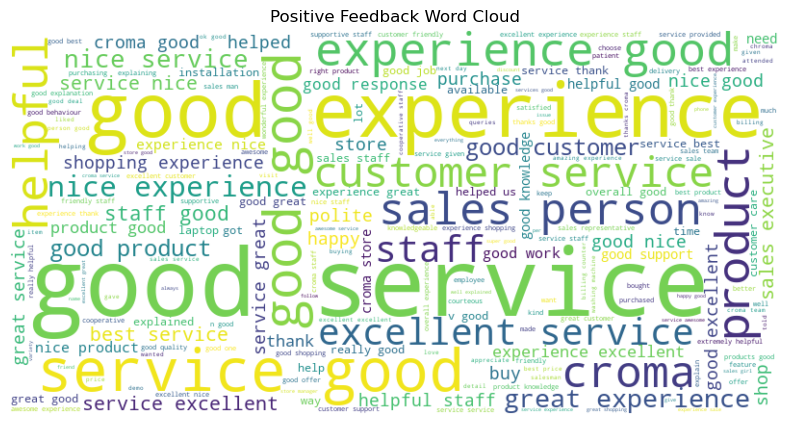

In [15]:
plot_wordcloud(positive_text, 'Positive Feedback Word Cloud')

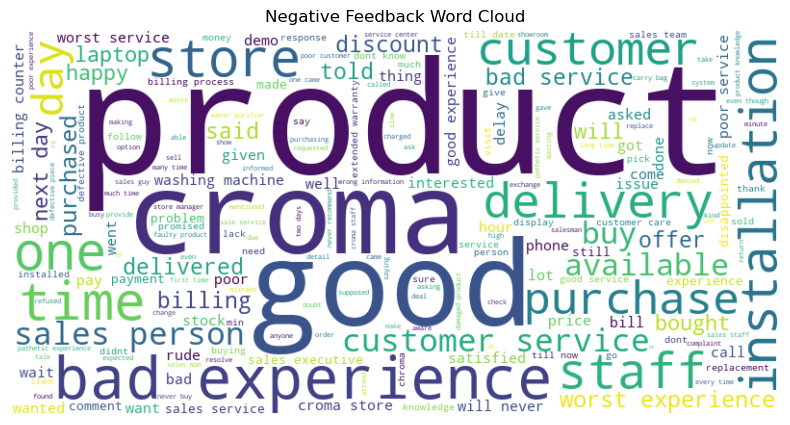

In [16]:
plot_wordcloud(negative_text, 'Negative Feedback Word Cloud')

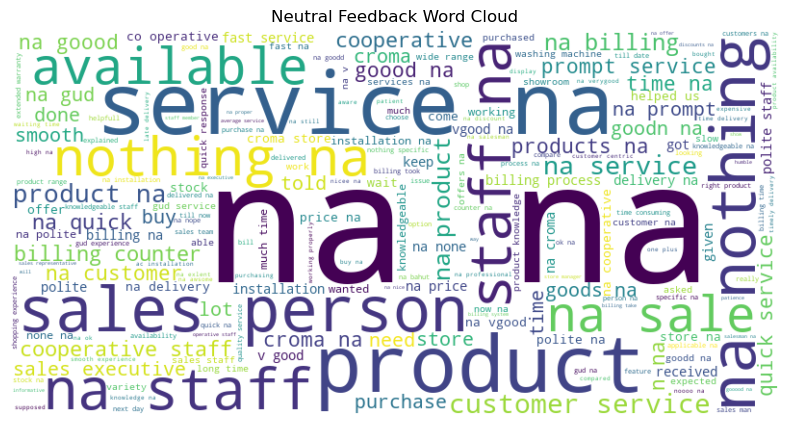

In [17]:
plot_wordcloud(neutral_text, 'Neutral Feedback Word Cloud')